In [1]:
from pathlib import Path
import sys,os
sys.path.append(os.pardir)
from tools.preprocess.common import CommonPreprocessor
from tools.preprocess.interaction_matrix_generator import InteractionMatrixGenerator
from tools.preprocess.bow_vectorizer import BOWVectorizer
from scipy.sparse import csr_matrix

In [2]:
orignal_path=Path("../data/preprocessed_50k.txt")

In [3]:
cp=CommonPreprocessor(split_seed=0)
songs=cp.get_song_list(orignal_path,shuffle=True)

In [4]:
corpus=[song["chords"] for song in songs]

In [5]:
print(corpus[0:2])

[['D#', 'D#add9', 'D#maj7', 'D#', 'Cm', 'D#', 'Cm', 'A#', 'A#add9', 'D#', 'Gm', 'Cm', 'Gm', 'Cm', 'G#', 'A#', 'G#', 'A#', 'Cm', 'Gm', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'Cm', 'Gm', 'G#', 'A#', 'G#', 'A#', 'D#', 'Cm', 'D#', 'Cm', 'A#', 'A#add9', 'D#', 'Gm', 'Cm', 'Gm', 'Cm', 'G#', 'A#', 'G#', 'A#', 'Cm', 'Gm', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'Cm', 'Gm', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'D#', 'A#', 'D#', 'G#', 'A#', 'Cm', 'Gm', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'Cm', 'Gm', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'G#', 'A#', 'D#'], ['Cm', 'G#', 'A#', 'G#', 'G', 'Cm', 'G#', 'A#', 'G#', 'G', 'Cm', 'D#', 'G#', 'A#', 'Cm', 'G#', 'A#', 'G', 'Cm', 'D#', 'G#', 'A#', 'Fm', 'Gm', 'G#', 'A#', 'Cm', 'Cm', 'G#', 'A#', 'G#', 'G', 'Cm', 'G#', 'A#', 'G#', 'G', 'Cm', 'D#', 'G#', 'A#', 'Cm', 'G#', 'A#', 'G', 'Cm', 'D#', 'G#', 'A#', 'Fm', 'Gm', 'G#', 'A#', 'G', 'G7', 'Cm', 'G', 'G7', 'Cm', 'G', 'G7', 'Cm', 'F', 'A#', 'Cm', 'Cm', 'D#', 'G#', 'A#', 'Cm', 'G#', 'A#', 

In [6]:
from gensim.models import word2vec
embedding_dim=100
min_count=5
window_size=5
iter_num=100
#Word2Vecモデルの学習
#sizeは特徴量の数、min_count以下の登場数の単語を無視、前後window幅の単語との関係を考慮、iter回数分繰り返し計算
model = word2vec.Word2Vec(corpus,
                          size=embedding_dim,
                          min_count=min_count,
                          window=window_size,
                          iter=iter_num)

In [7]:
model.wv["C"]

array([ 1.0843617 , -0.3798569 ,  3.3713017 , -0.84081286,  1.6296694 ,
        1.2485127 ,  1.5891131 ,  1.1345139 , -0.25329813, -0.566124  ,
        0.54725564,  1.1673039 ,  0.47734264,  3.193037  , -1.0500451 ,
        0.66397786, -2.780213  , -2.0588603 , -0.66107243, -0.10212222,
       -2.6570346 ,  0.4821944 ,  1.7026    , -0.4544317 , -0.24422662,
        0.08306962, -1.3305839 , -0.98428774,  0.47898075,  2.8967307 ,
       -1.4286901 ,  1.8021398 , -0.15195733, -1.033426  , -2.2507792 ,
        1.2887895 , -0.16526903,  1.8795787 ,  1.3352832 , -1.0936543 ,
       -1.2192235 , -1.753939  ,  2.103858  ,  2.3448923 ,  2.2743788 ,
       -1.2590891 ,  2.0361905 , -1.3777632 , -1.097232  ,  3.997124  ,
        2.599095  ,  0.49616027,  2.5342722 ,  0.2036998 ,  1.9263409 ,
        2.5849018 , -1.6080322 ,  0.24251465, -2.731308  ,  1.3693608 ,
        0.39544258, -1.1566558 , -0.15546408,  1.3383292 , -0.30760112,
        0.6412667 ,  0.89011425,  0.32591006, -1.5986617 ,  2.65

In [8]:
embeddings={chord:model.wv[chord] for chord in model.wv.vocab.keys()} 

In [9]:
embeddings["A"]

array([-0.9807487 ,  0.9326386 ,  0.9295933 ,  0.22560771, -0.6048424 ,
       -0.6344396 ,  0.87064207, -0.805689  , -0.2907112 ,  2.3734503 ,
       -0.692096  , -0.5265311 ,  1.8763058 ,  1.3580928 ,  0.17233121,
       -0.7753297 , -0.10371967, -0.08882532,  2.9027576 ,  3.9987323 ,
        0.8919791 , -0.6547505 ,  0.93628377,  3.74132   ,  0.55665535,
        0.09870818,  0.5248192 , -0.41909772,  0.7072046 ,  3.6932912 ,
       -1.2471088 ,  1.6755155 , -0.6860865 ,  1.305803  ,  0.60912293,
        1.0695328 ,  1.8934368 ,  1.6856627 ,  0.29117227, -1.3019795 ,
        2.4370298 , -0.9812268 , -1.7607296 , -0.16583227, -2.962118  ,
       -2.2077177 ,  0.9837543 ,  2.4321485 ,  0.31314686,  0.92086893,
       -1.335251  ,  0.67577285, -2.782423  , -0.15664002,  1.1061703 ,
        0.84373856, -1.4775866 ,  1.7702264 ,  2.0185456 , -2.0644252 ,
       -2.437272  , -3.6614807 , -0.828087  ,  1.6616883 ,  0.83314043,
        1.8989094 , -1.5643399 ,  3.824229  ,  0.6093559 ,  1.83

In [10]:
import numpy as np
from sklearn.decomposition import PCA  
def get_pca_embeddings(embeddings,n_compenents):
    chords=[]
    embeddings_mat=[]
    for chord, embedding in embeddings.items():
            chords.append(chord)
            embeddings_mat.append(embedding)
        
    pca = PCA(n_components=n_compenents)                     # 3次元に圧縮するPCAインスタンスを作成
    X = pca.fit_transform(np.array(embeddings_mat))
    
    result={}
    for i in range(len(chords)):
        result[chords[i]]=X[i]
    return result


In [11]:
pca_embeddings=get_pca_embeddings(embeddings,2)

In [12]:
pca_embeddings["A"]

array([6.5793314, 8.432776 ], dtype=float32)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_embeddings(embeddings,target_chords):
    if len(list(embeddings.values())[0]) != 2:
        raise Exception("Invalid embeddings given.")
    x1=[]
    x2=[]
    for target_chord in target_chords:
        x1.append(embeddings[target_chord][0])
        x2.append(embeddings[target_chord][1])

    for (i,j,k) in zip(x1,x2,target_chords):
            plt.plot(i,j)
            plt.annotate(k, xy=(i, j))
    plt.show()

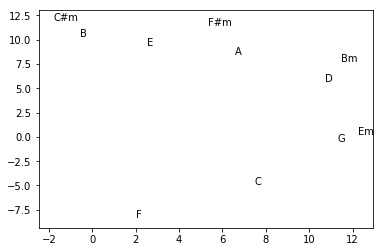

In [14]:
plot_embeddings(pca_embeddings,["A","B","C","D","E","F","G","Bm","C#m","Em","F#m"])

In [15]:
model.wv.most_similar(positive=["C"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Am', 0.597371518611908),
 ('Em', 0.5930373668670654),
 ('C/B', 0.5798251628875732),
 ('G', 0.5173560976982117),
 ('Cadd9', 0.497519314289093),
 ('F', 0.4797593951225281),
 ('Fadd9', 0.4521275460720062),
 ('G/B', 0.45109203457832336),
 ('C/F', 0.4088296890258789),
 ('Amadd9', 0.405240923166275)]

In [16]:
# Asus4 -A +  C = ?
model.wv.most_similar(positive=["Asus4","C"],negative=["A"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Csus4', 0.539544403553009),
 ('Gsus4', 0.4912540018558502),
 ('Am', 0.4676171541213989),
 ('C/B', 0.45021623373031616),
 ('F', 0.4418523609638214),
 ('Amadd9', 0.41868144273757935),
 ('Em', 0.4010193645954132),
 ('G/B', 0.39310288429260254),
 ('Cmaj9', 0.3853359520435333),
 ('Fadd9', 0.37922319769859314)]

In [17]:
# A7 -A +  C = ?
model.wv.most_similar(positive=["A7","C"],negative=["A"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('C7', 0.4864072799682617),
 ('Am7', 0.43953531980514526),
 ('C/B', 0.4273948073387146),
 ('G7', 0.42114418745040894),
 ('A7+5', 0.40817809104919434),
 ('C/E', 0.38820958137512207),
 ('Gm7/C', 0.38304403424263),
 ('Am7/D', 0.38024261593818665),
 ('Dm/C', 0.3759441375732422),
 ('C/F', 0.3753754496574402)]

In [18]:
# C - F = ? -G (Dになってほしい)
model.wv.most_similar(positive=["C","G"],negative=["F"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Em', 0.7174035310745239),
 ('D', 0.5884319543838501),
 ('Cadd9', 0.560377836227417),
 ('Bm', 0.4962432384490967),
 ('D/G', 0.4831462800502777),
 ('G/B', 0.40751364827156067),
 ('D/C', 0.40353888273239136),
 ('C/B', 0.3735170364379883),
 ('Emadd9', 0.3557337522506714),
 ('Cmaj9', 0.35384368896484375)]

In [19]:
# G - C = ? - D (Aになってほしい)
model.wv.most_similar(positive=["G","D"],negative=["C"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Bm', 0.683678388595581),
 ('D/C#', 0.5587323904037476),
 ('A', 0.538498044013977),
 ('Gadd9', 0.5211036205291748),
 ('F#m', 0.5101524591445923),
 ('A/C#', 0.5041470527648926),
 ('A/G', 0.4661417603492737),
 ('BmM7', 0.4379009008407593),
 ('Gmaj9', 0.40342557430267334),
 ('Gmaj7', 0.39663657546043396)]